In [8]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [9]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

In [10]:
working_dir = '/ninod/NCAR_LENS/daily/PRECT/B1850C5CN/'

In [11]:
file_list = numpy.array(( \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-04991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.05000101-05991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.06000101-06991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.07000101-07991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.08000101-08991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.09000101-09991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.10000101-10991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.11000101-11991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.12000101-12991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.13000101-13991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.14000101-14991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.15000101-15991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.16000101-16991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.17000101-17991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.18000101-18991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.19000101-19991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.20000101-20991231.nc', \
'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.21000101-22001231.nc' ))

In [12]:
i = 0

ncfile = netCDF4.Dataset(working_dir + file_list[i])
PRECT_lat = ncfile.variables['lat'][:]
PRECT_lon = ncfile.variables['lon'][:]
PRECT_time_var = ncfile.variables['time']

PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)
time_indices_ONDJFM = numpy.array([t.month in [10,11,12,1,2,3] for t in PRECT_time_dates], dtype=bool)

LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
LA_lon_idx = geo_idx(LA_lon, PRECT_lon)

PRECT_ONDJFM_CA = ncfile.variables['PRECT'][time_indices_ONDJFM,(LA_lat_idx-2):(LA_lat_idx+2), (LA_lon_idx-2):(LA_lon_idx+2)]*86400.*1000

In [13]:
bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_CA.max()),100) # log spaced bins
#bins = numpy.linspace(0.1,PRECT_ONDJFM_CA.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_CA, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

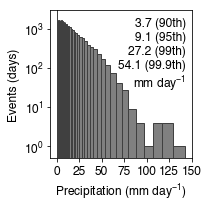

In [14]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)
ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
#ax.set_xlim(bins[0], bins[-1])
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Events (days)', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xticks([0,25,50,75,100,125,150])
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.minorticks_off()
#ax.grid()
ax.set_axisbelow(True)

ax.set_ylim(0.5,3000)
#ax_right = ax.twinx()
ax_min, ax_max = ax.get_ylim()
#ax_right.set_yticks([1,2,3,4,5,10])
#ax_right.tick_params(labelsize=fontsize)
#ax_right.set_ylim(numpy.log(ax_min), numpy.log(ax_max))

perc50 = numpy.percentile(PRECT_ONDJFM_CA, 50)
perc75 = numpy.percentile(PRECT_ONDJFM_CA, 75)
perc80 = numpy.percentile(PRECT_ONDJFM_CA, 80)
perc90 = numpy.percentile(PRECT_ONDJFM_CA, 90)
perc95 = numpy.percentile(PRECT_ONDJFM_CA, 95)
perc99 = numpy.percentile(PRECT_ONDJFM_CA, 99)
perc999 = numpy.percentile(PRECT_ONDJFM_CA, 99.9)

perc_text = \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'

ax.text(s=perc_text, x=0.96, y=0.93, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

fig.tight_layout()

mp.savefig('single_realization_preindustrial.pdf', transparent=True, bbox_inches='tight')

b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-04991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.05000101-05991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.06000101-06991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.07000101-07991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.08000101-08991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.09000101-09991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.10000101-10991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.11000101-11991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.12000101-12991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.13000101-13991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.14000101-14991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.15000101-15991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.16000101-16991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.17000101-17991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.18000101-18991231.nc
b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.19000101-19991231.nc
b.e11.B1

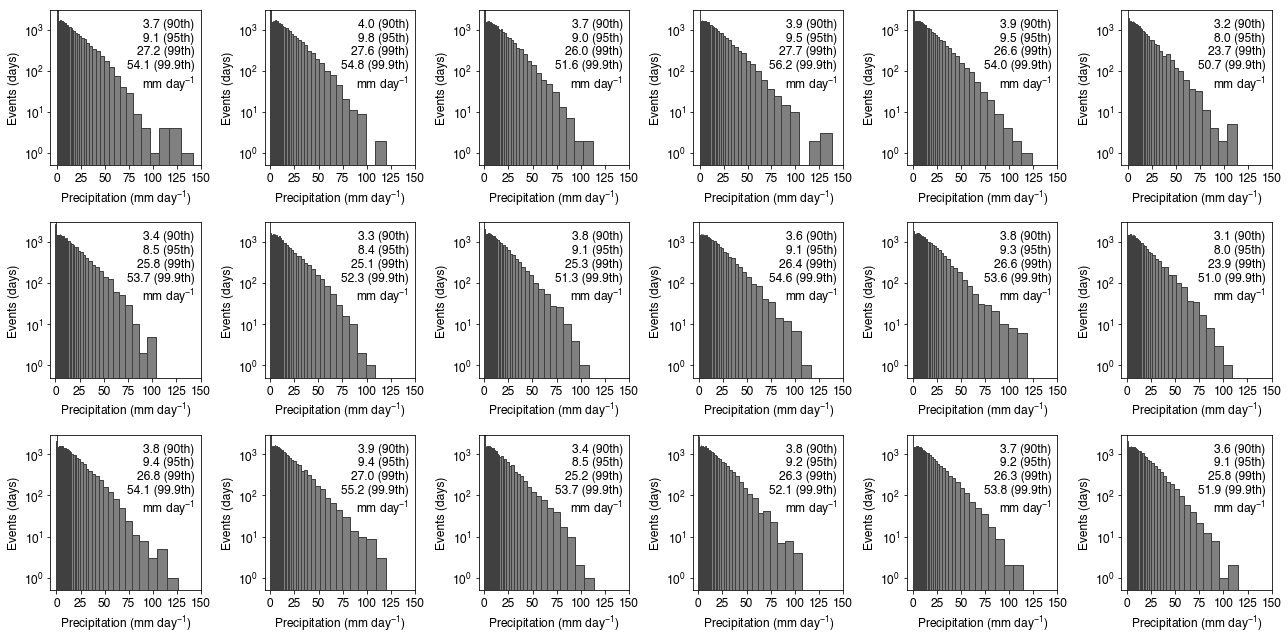

In [15]:
fig = mp.figure(figsize=(18,9))
fontsize=12

for i in range(file_list.size):
    
    print(file_list[i])
    
    ncfile = netCDF4.Dataset(working_dir + file_list[i])
    PRECT = ncfile.variables['PRECT'][:,(LA_lat_idx-2):(LA_lat_idx+2),(LA_lon_idx-2):(LA_lon_idx+2)]*86400.*1000
    PRECT_time_var = ncfile.variables['time']
    
    PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)
    time_indices_ONDJFM = numpy.array([t.month in [10,11,12,1,2,3] for t in PRECT_time_dates], dtype=bool)
    #PRECT_ONDJFM = PRECT[time_indices_ONDJFM,:,:]
    PRECT_ONDJFM_CA = PRECT[time_indices_ONDJFM,:,:]

    ncfile.close()
    
    bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_CA.max()),100) # log spaced bins
    #bins = numpy.linspace(0.1,PRECT_ONDJFM_CA.max(),100) # linearly spaced bins
    hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_CA, bins=bins, density=False)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

    ax = fig.add_subplot(3,6,i+1)
    ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
    #ax.set_xlim(bins[0], bins[-1])
    ax.tick_params(labelsize=fontsize)
    ax.set_ylabel('Events (days)', fontsize=fontsize)
    ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
    ax.set_yscale('log') # 'symlog'
    ax.set_xticks([0,25,50,75,100,125,150])
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
    ax.set_ylim(0.5,3000)
    ax.minorticks_off()
    #ax.grid()
    #ax.set_axisbelow(True)

    perc90 = numpy.percentile(PRECT_ONDJFM_CA, 90)
    perc95 = numpy.percentile(PRECT_ONDJFM_CA, 95)
    perc99 = numpy.percentile(PRECT_ONDJFM_CA, 99)
    perc999 = numpy.percentile(PRECT_ONDJFM_CA, 99.9)

    perc_text = \
    '{:.1f}'.format(perc90) + ' (90th)\n' + \
    '{:.1f}'.format(perc95) + ' (95th)\n' + \
    '{:.1f}'.format(perc99) + ' (99th)\n' + \
    '{:.1f}'.format(perc999) + ' (99.9th)\n' + \
    'mm day$^{-1}$'

    ax.text(s=perc_text, x=0.96, y=0.93, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)


fig.tight_layout()
mp.savefig('preindustrial_control_histograms.pdf', transparent=True, bbox_inches='tight')

In [32]:
print(ax_min, ax_max)

0.667123605216 4916.63010326
